In [1]:
import numpy as np
from scipy.optimize import minimize


In [2]:
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2


In [3]:

def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)

In [4]:
def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  lin_out = weights.T * inputs + biases.T                                        # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out

In [5]:
def der_NN_xj_k(p,inputs,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  temp1 = weights**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T * inputs + biases.T

  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4

In [6]:
def func(p,x):
  _, N = layer1NN(p,x)
  # x.resize((len(inputs),1))
  # Define Function
  temp1 = x**3 + 2*x
  temp2 = (x**2)* ((1+3*(x**2))/(1+x+x**3))
  temp3 = (x+ (1+3*(x**2))/(1+x+x**3))*(1+x*N)
  # print(x.shape)
  return temp1 + temp2 - temp3

In [7]:
def error(p,x):
  # x.resize((len(inputs),1))
  _, N = layer1NN(p,x)
  DN = der_NN_xj_k(p,x ,k=1)
  f = func(p,x)
  temp1 = N + x*DN - f
  # print(N.shape,f.shape,(temp1).shape)
  return temp1@temp1.T

In [8]:
def grad(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  output = weights.T * inputs + biases.T
  nor_out = sigmoid(output)
  out1 = nweights @ nor_out

  sig = sigmoid(output)
  sig1 = sigmoid1(output)
  sig2 = sigmoid2(output)



  DN_DX_V = weights*sig1.T
  DN_V = sig.T
  cons = 1 + (inputs)*((inputs) + (1+3*(inputs)**2)/(1+(inputs)+(inputs)**3))
  err_for_T_V = (inputs*DN_DX_V.T) + cons*DN_V.T


  DN_DX_U = (nweights*weights)*sig2.T
  DN_U = nweights*sig1.T
  err_for_T_U = (inputs*DN_DX_U.T) + cons*DN_U.T


  a = ((nweights*weights)*sig2.T)
  DN_DX_W = (a.T* inputs).T + nweights*sig1.T
  DN_W = ((nweights*sig1.T).T* inputs).T

  err_for_T_W = (inputs*DN_DX_W.T) + cons*DN_W.T



  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  f = func(p,inputs)
  err = (N + inputs*DN - f)



  DW = err @ err_for_T_W.T
  DU = err @ err_for_T_U.T
  DV = err @ err_for_T_V.T


  dp = np.array([DW,DU,DV])
  dp = dp.reshape(1,len(p))

  return 2*dp[0]

In [9]:
inputs = np.linspace(0,1,10)


n_inputs = 1
n_neurons =10

p = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p =p[0]

## Using 'nelder-mead'

In [ ]:
error(p,inputs)

array([[665.85818134]])

In [10]:
res = minimize(error,p, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})

<ipython-input-10-9e96c18359c6>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(error,p, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


In [13]:
res = minimize(error,p,args=(inputs))

In [14]:
error(res.x,inputs)

array([[2.88151367e-07]])

In [15]:
def my_function(x):
    numerator = np.exp(-x**2 / 2)
    denominator = 1 + x + x**3
    second_term = x**2

    result = (numerator / denominator) + second_term
    return result

# ya.shape

In [29]:
x_test = np.linspace(0,1,100)


_, N = layer1NN(res.x,x_test)
yt = 1+ x_test*N
ya = my_function(x_test)

In [30]:
error(res.x,x_test)

array([[3.71905921e-06]])

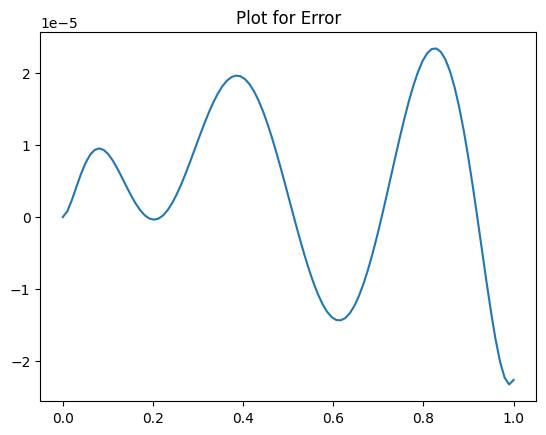

In [21]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt).reshape(100,1))
plt.title('Plot for Error')
plt.show()

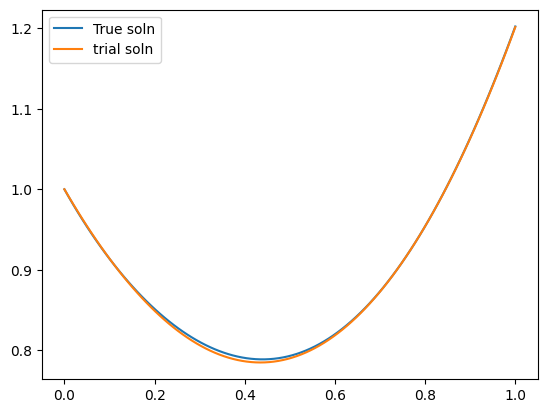

In [ ]:
plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( yt.reshape(100,1)),label = 'trial soln')
plt.legend()
plt.show()

## Using 'BFGS'

In [ ]:
inputs = np.linspace(0,1,100)


n_inputs = 1
n_neurons =1000

p = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p =p[0]

In [ ]:
# res = minimize(error, p, method='BFGS', jac=grad,args=(inputs), options={ 'disp': True})
# p = res.x
# res = minimize(error, p, method='CG', jac=grad,args=(inputs), options={ 'disp': True})
# p = res.x
# res = minimize(error, p, method='POWELL', jac=grad,args=(inputs), options={ 'disp': True})plt.plot(x_test,( ya),label = 'True soln')
res = minimize(error, p,args=(inputs))

In [ ]:
error(p,inputs)

array([[62968.69568355]])

In [ ]:
print(error(res.x,inputs))

[[3.05827107e-07]]


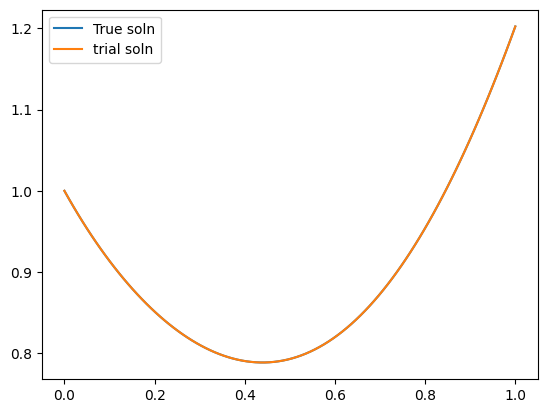

In [ ]:
x_test = np.linspace(0,1,100)


_, N = layer1NN(res.x,x_test)
yt = 1+ x_test*N
ya = my_function(x_test)

plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()



Text(0.5, 1.0, 'Plot for Error')

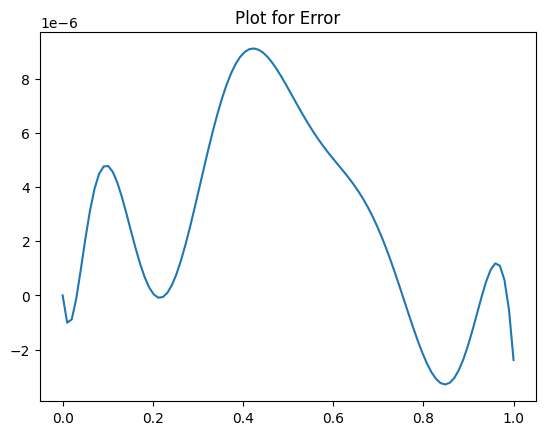

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt).reshape(100,1))
plt.title('Plot for Error')

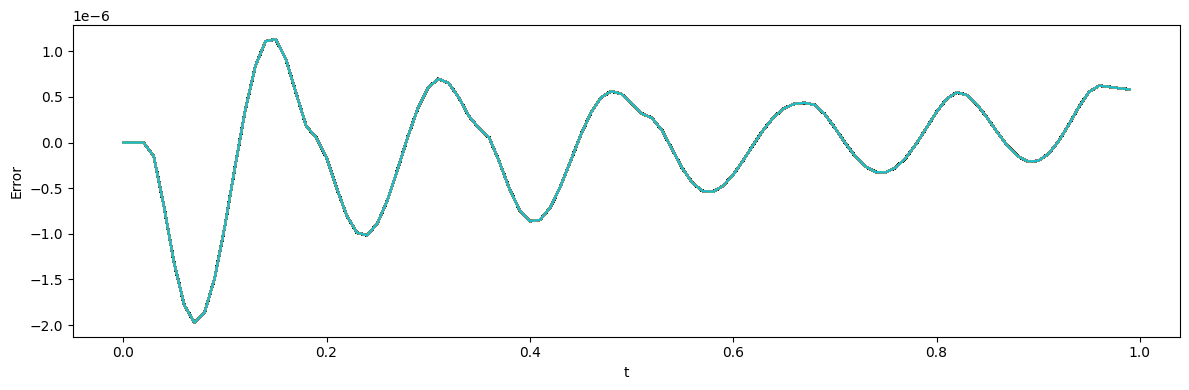

Mean time taken: 0.002818 seconds
Standard deviation: 0.001795 seconds


In [35]:

from scipy.integrate import solve_ivp
import time
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE function
F = lambda t, s: ((t**3 + 2*t) + ((t**2)* ((1+3*(t**2))/(1+t+t**3))) - ((t+ (1+3*(t**2))/(1+t+t**3))*(s)))

# Set up the time evaluation points
t_eval = np.arange(0, 1, 0.01)

# Number of iterations to perform
num_iterations = 1000

# Arrays to store elapsed times and solutions
elapsed_times = np.zeros(num_iterations)
solutions = []

# Perform multiple iterations to measure time and store solutions
for i in range(num_iterations):
    start_time = time.time()

    sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval, rtol=1e-6, atol=1e-6)

    end_time = time.time()
    elapsed_time = end_time - start_time

    elapsed_times[i] = elapsed_time
    solutions.append(sol.y[0])

# Plot the errors
plt.figure(figsize=(12, 4))
for i, solution in enumerate(solutions):
    plt.plot(sol.t, sol.y[0] - (np.exp(-(sol.t)**2/2)/(1 + sol.t + sol.t**3) + (sol.t)**2))

plt.xlabel('t')
plt.ylabel('Error')
# plt.legend()
plt.tight_layout()
plt.show()

# Print the mean and standard deviation of the elapsed times
print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


Time taken: 0.011715412139892578 seconds


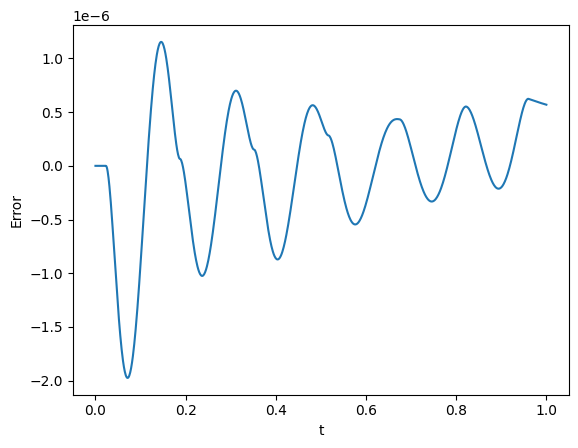

In [36]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import time

# plt.style.use('seaborn-poster')



%matplotlib inline

F = lambda t, s: ((t**3 + 2*t) + ((t**2)* ((1+3*(t**2))/(1+t+t**3))) - ((t+ (1+3*(t**2))/(1+t+t**3))*(s)))
# Record the start time
start_time = time.time()

t_eval = np.linspace(0,1,1000)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval,rtol = 1e-6, atol = 1e-6)



# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time} seconds")




# plt.figure(figsize = (12, 4))
# plt.subplot(121)
# plt.plot(sol.t, sol.y[0])
# plt.xlabel('t')
# plt.ylabel('S(t)')
# plt.subplot(122)
plt.plot(sol.t, sol.y[0] - (np.exp(-(sol.t)**2/2)/(1 + sol.t + sol.t**3) + (sol.t)**2))
plt.xlabel('t')
plt.ylabel('Error')
# plt.tight_layout()
plt.show()

Error Plots for different Training points and Different Hidden units

In [ ]:
def error_min_train_hidd(neurons, train_points):
  # Training Points                                                               # Intial Values
  x_train = np.linspace(0,1,train_points)

  n_inputs = 1
  n_neurons = neurons
  p = np.random.randn(1,3*n_neurons)
  p =p[0]
  res = minimize(error, p, method='BFGS', jac=grad,args=(x_train), options={ 'disp': False})
  return res.x


In [ ]:
def plot_for_diff_hidd_units(list_neurons, train_points):
  x_test = np.linspace(0,1,100)
  for neurons in list_neurons:
    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(neurons, train_points)


      _, N = layer1NN(weights ,x_test)
      yi = 1+ x_test*N
      ysum += yi
    yt = ysum/run
    ya = my_function(x_test)
    plt.plot(x_test,((ya - yt).reshape(100,1)),label = 'error for hidden units = {}'.format(neurons))
  plt.legend()
  plt.title('No. of Training points are {}'.format(train_points))
  plt.show()

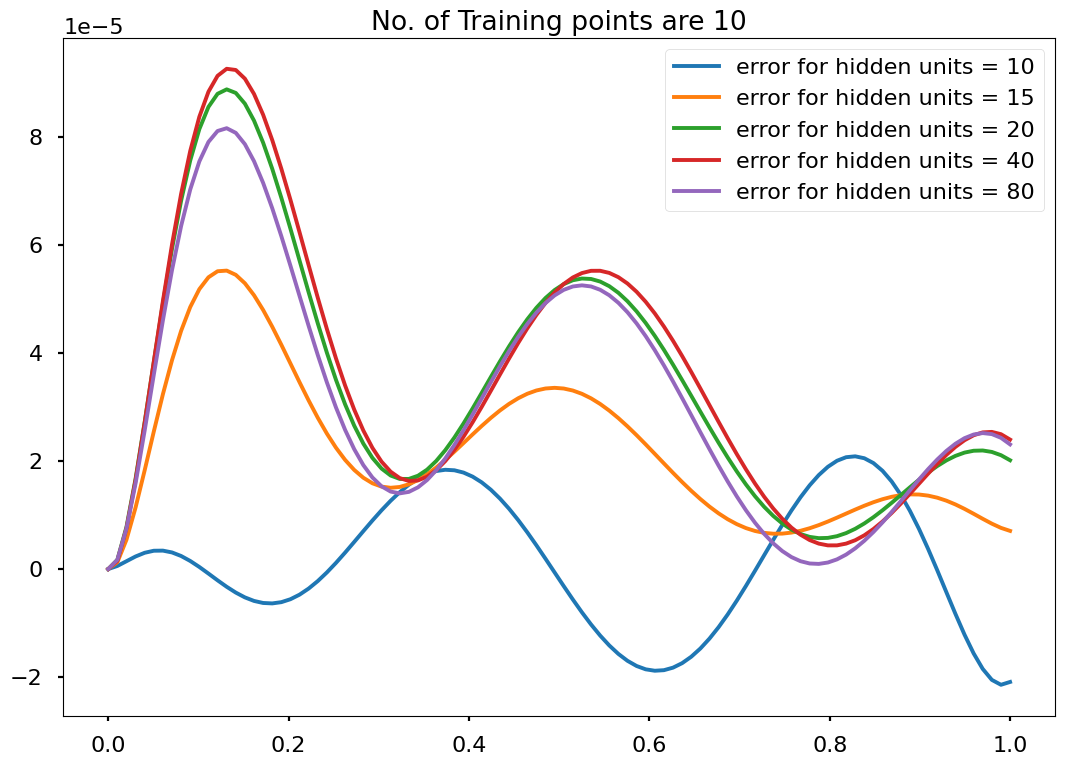

In [ ]:
list_neuron = [10,15,20,40,80]
plot_for_diff_hidd_units(list_neuron, 10)

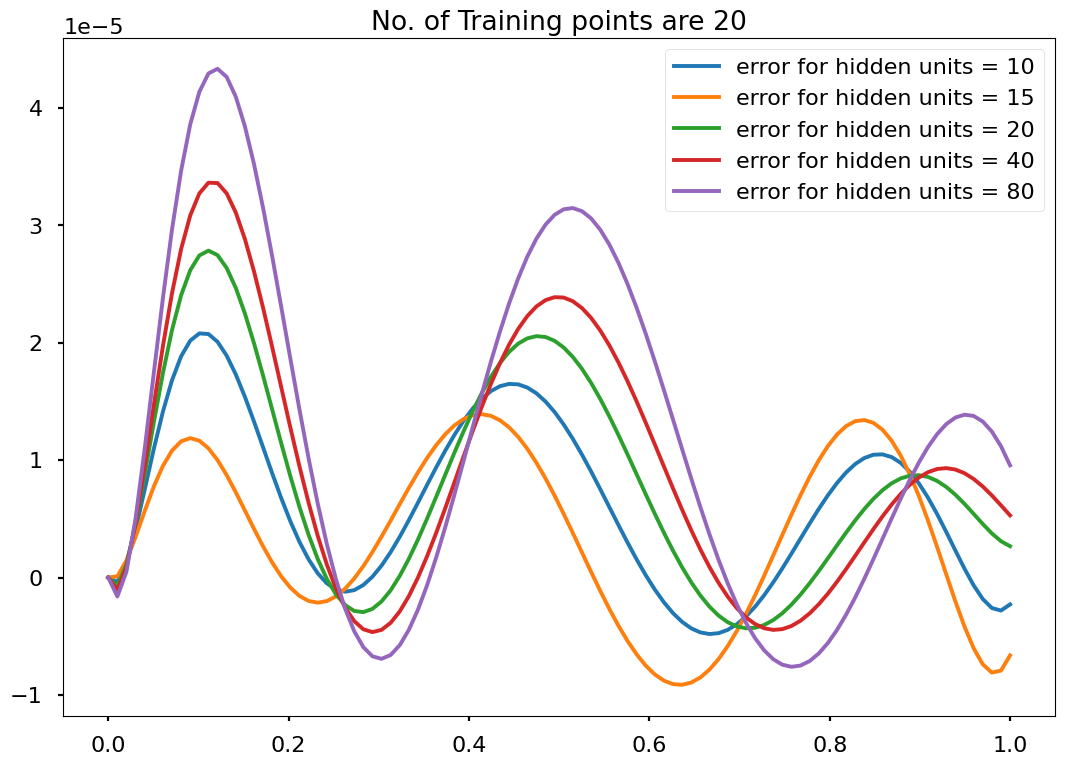

In [ ]:
list_neuron = [10,15,20,40,80]
plot_for_diff_hidd_units(list_neuron, 20)

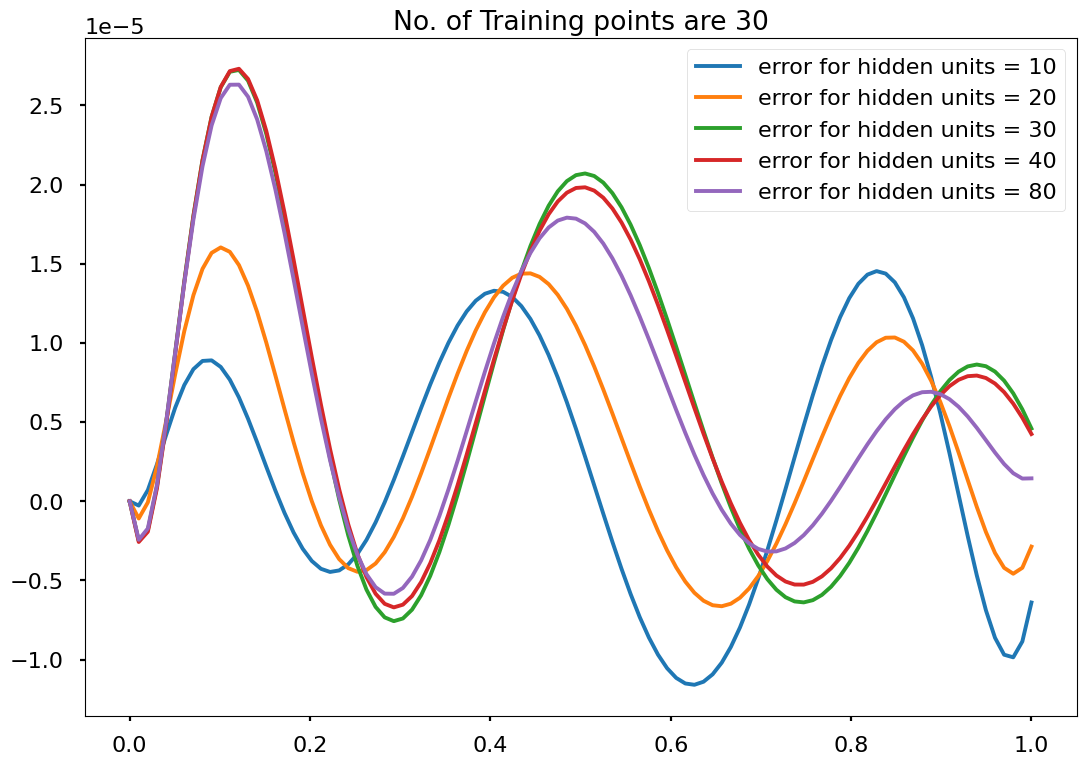

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 30)

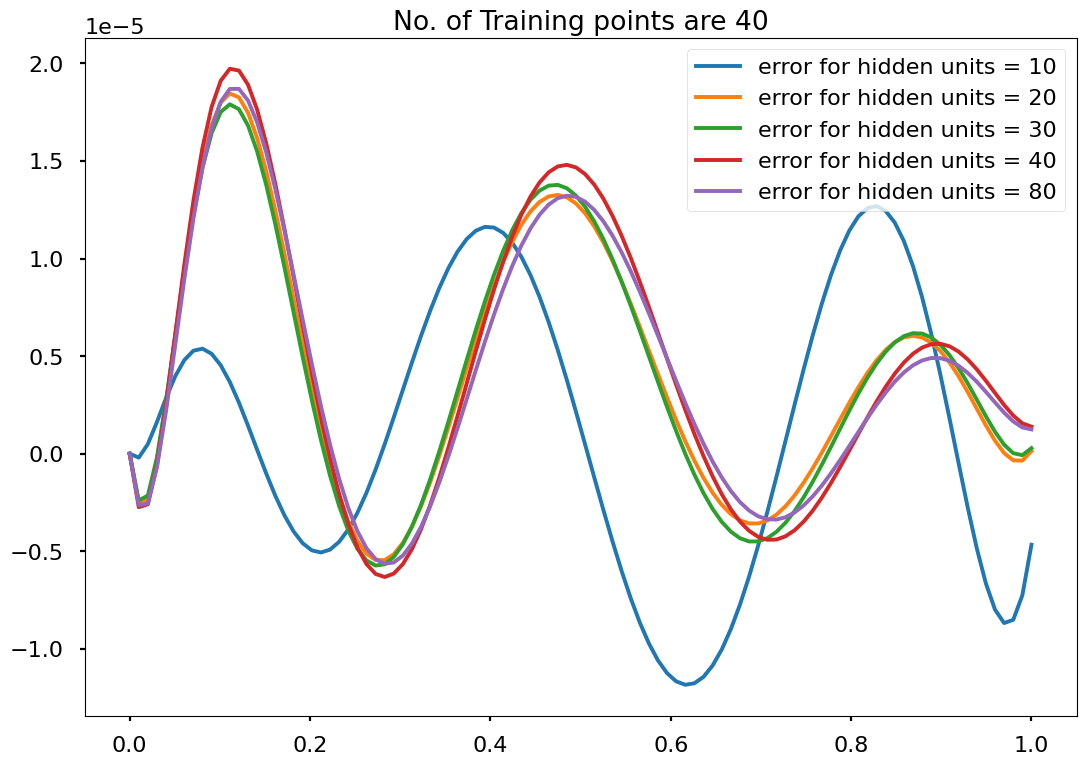

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 40)

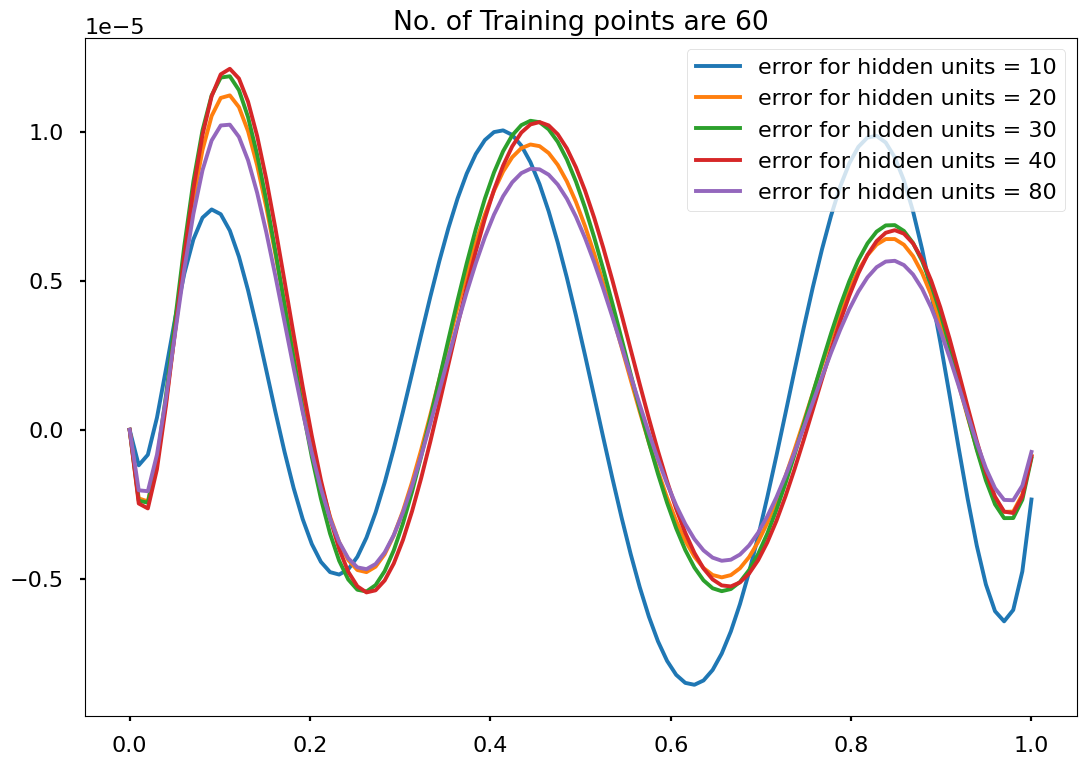

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 60)

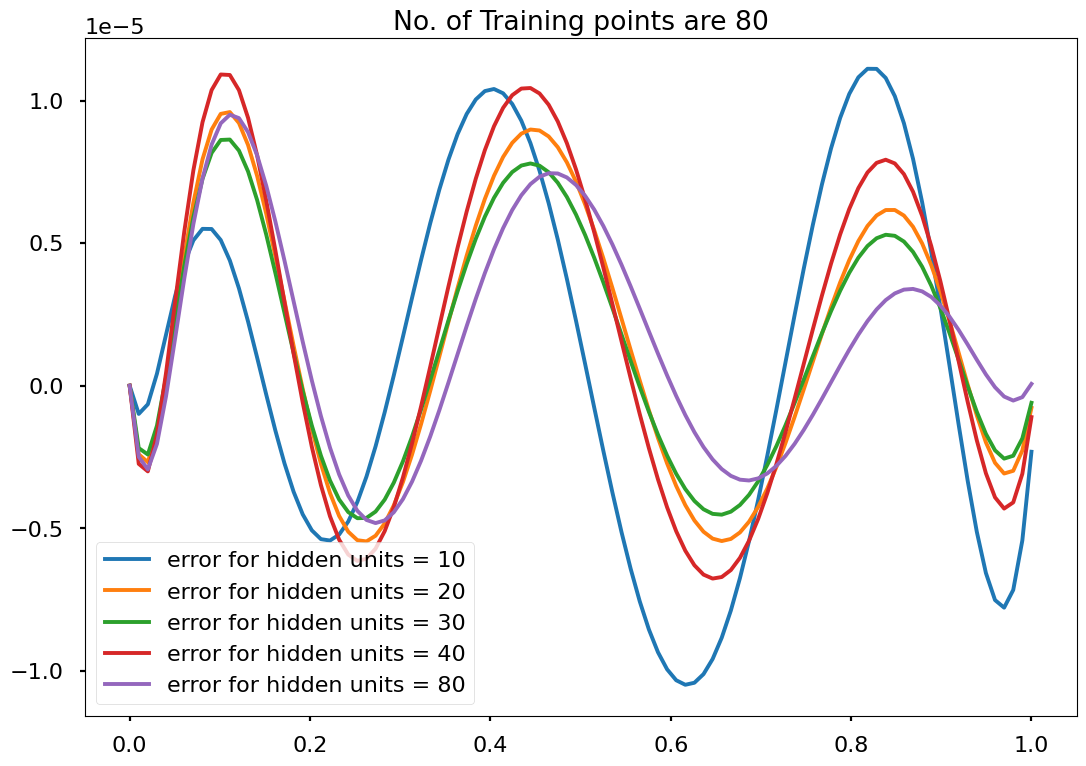

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 80)

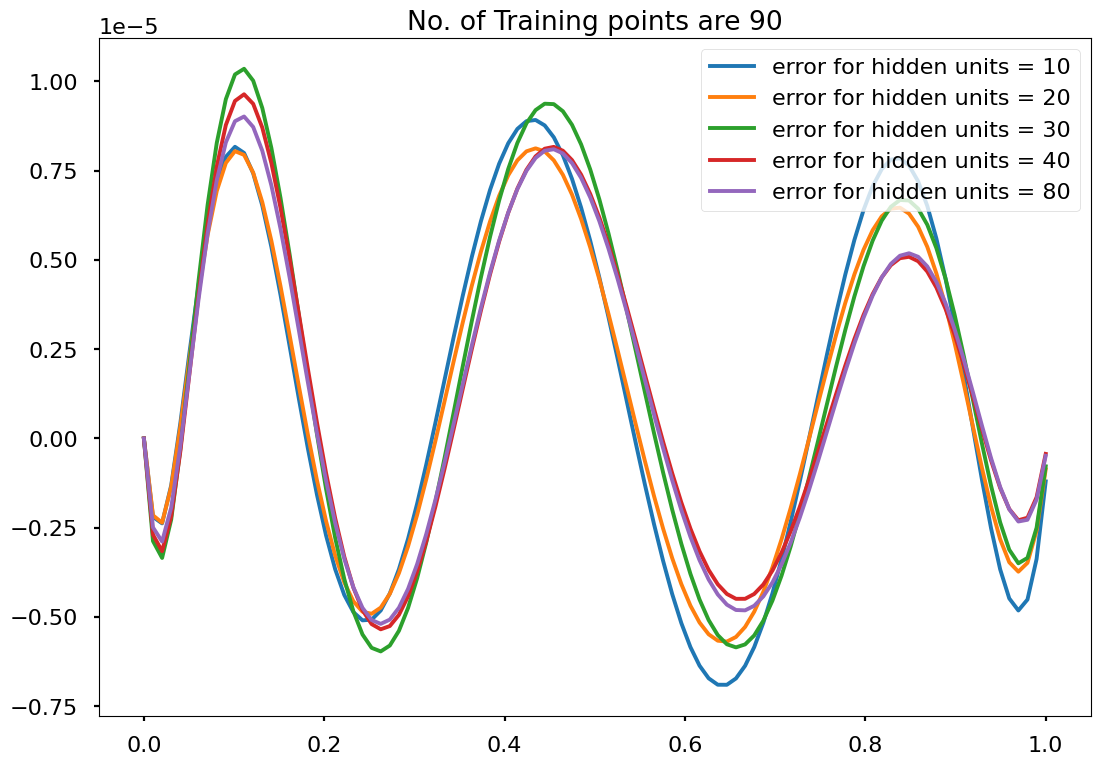

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 90)

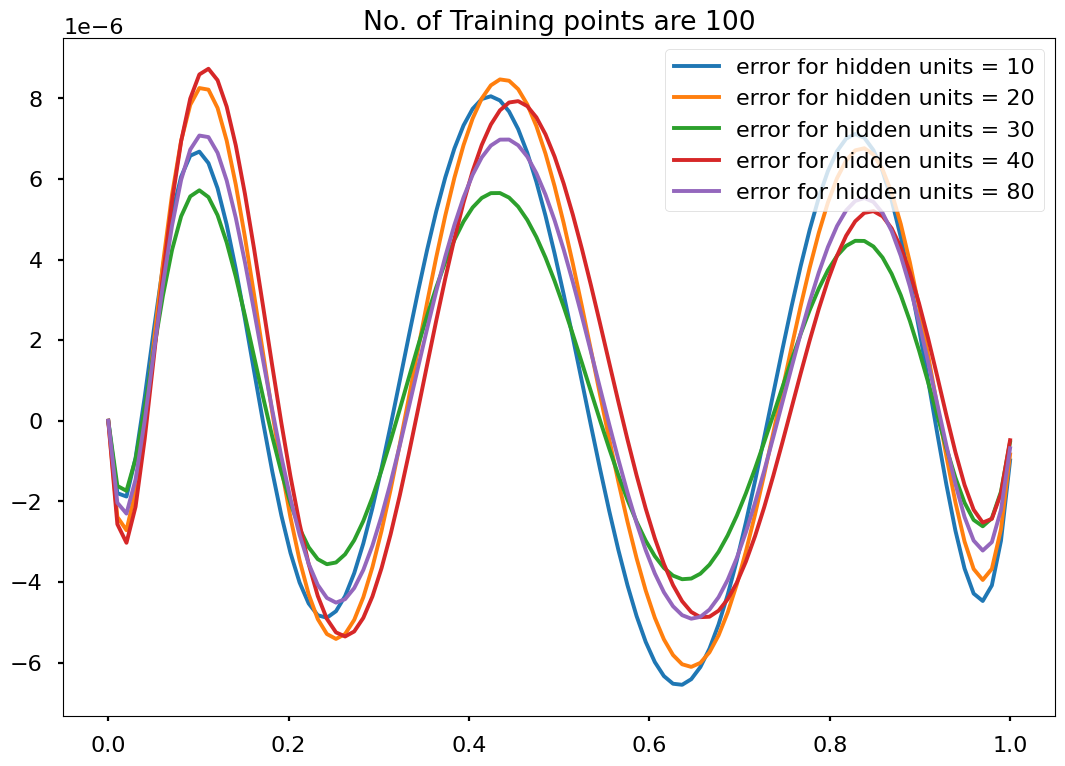

In [ ]:
list_neuron = [10,20,30,40,80]
plot_for_diff_hidd_units(list_neuron, 100)

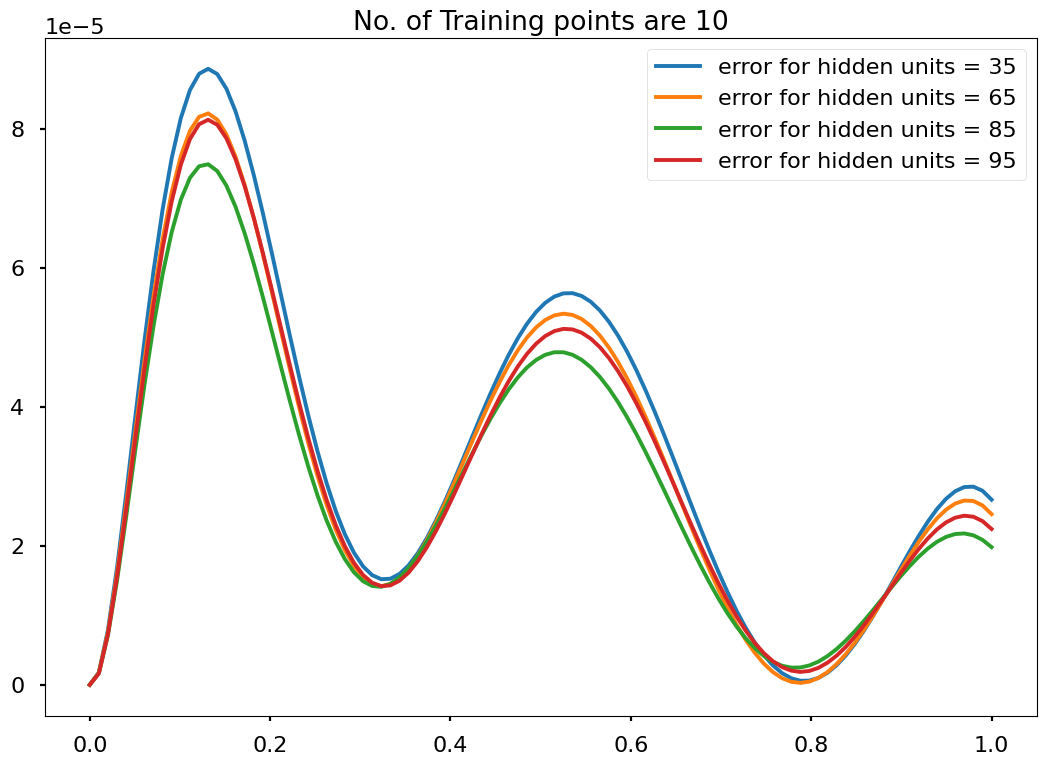

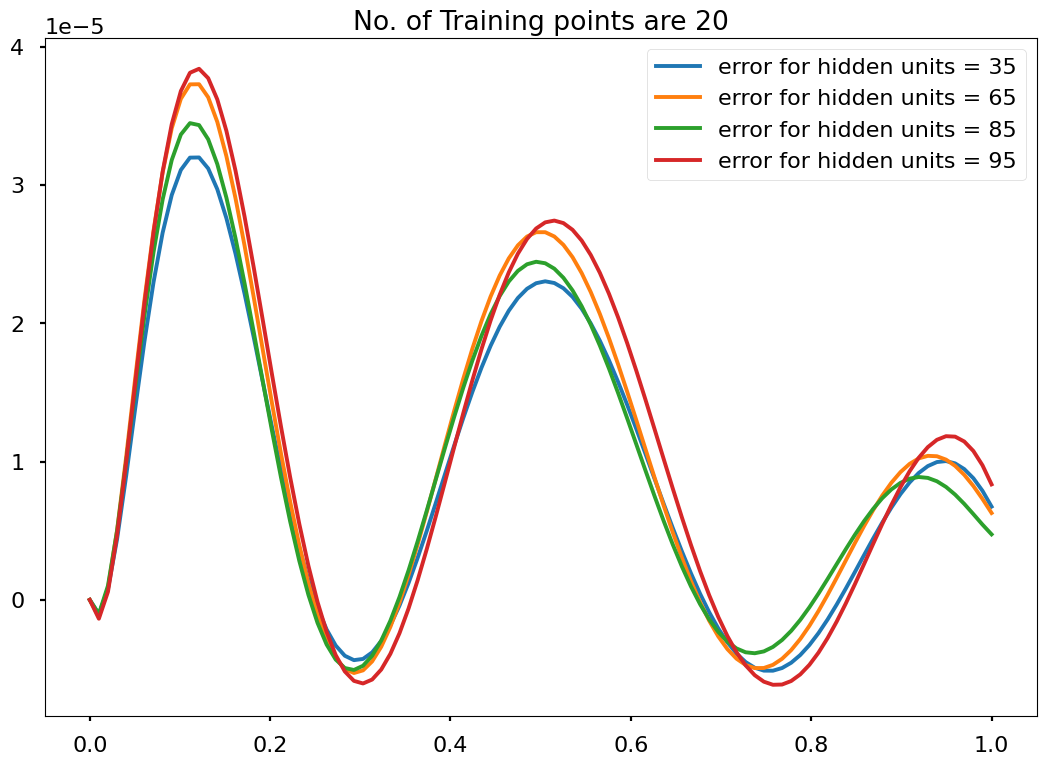

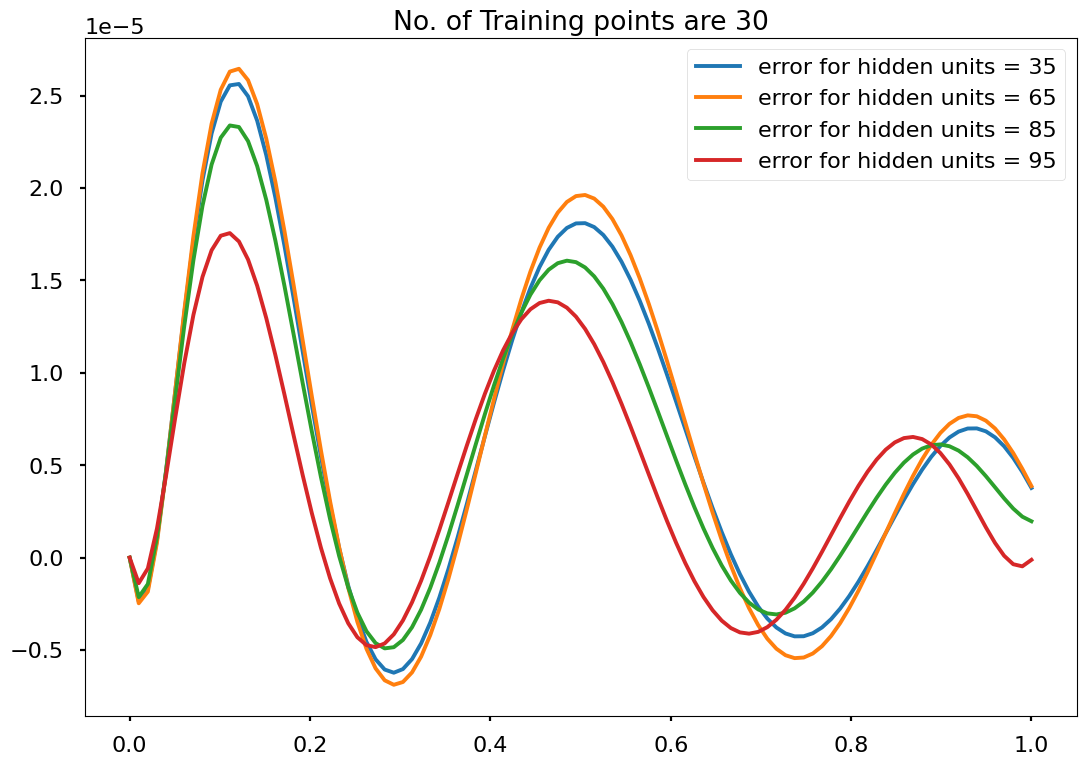

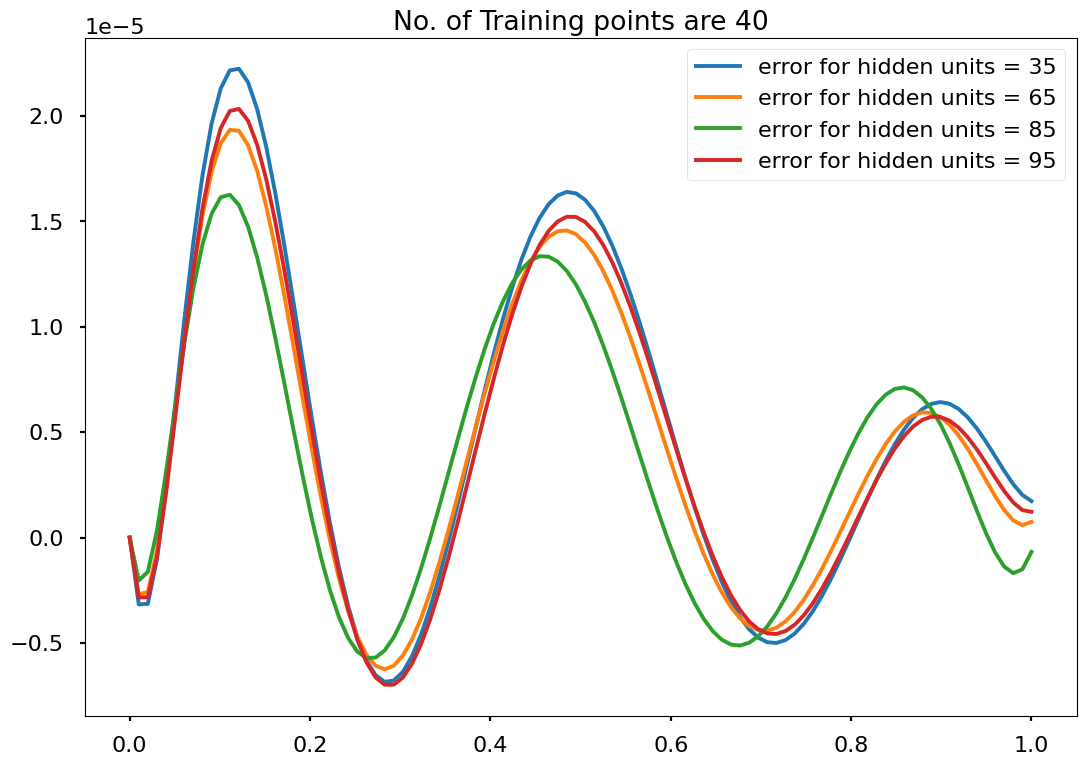

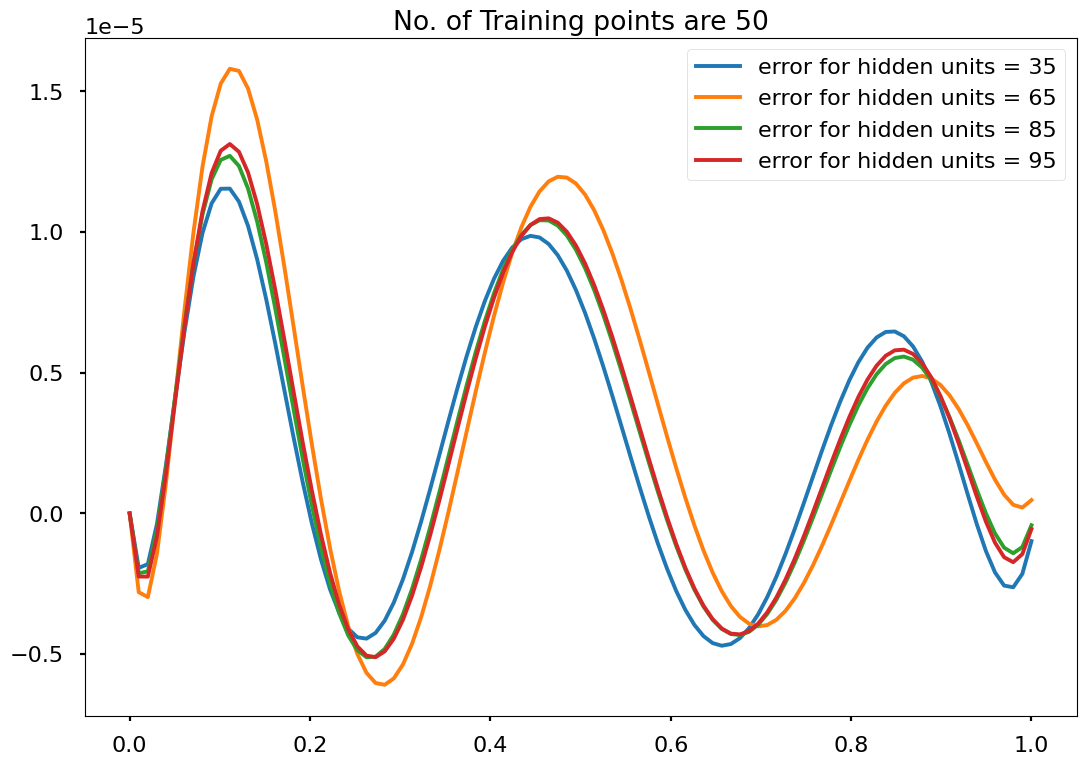

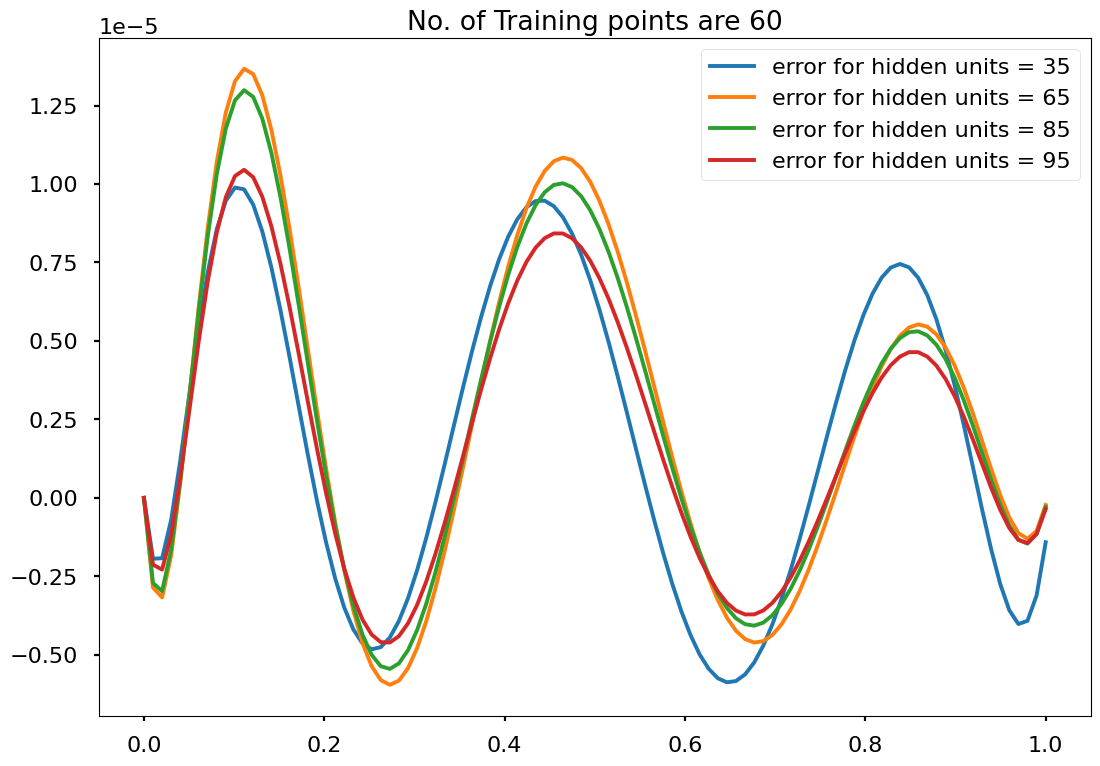

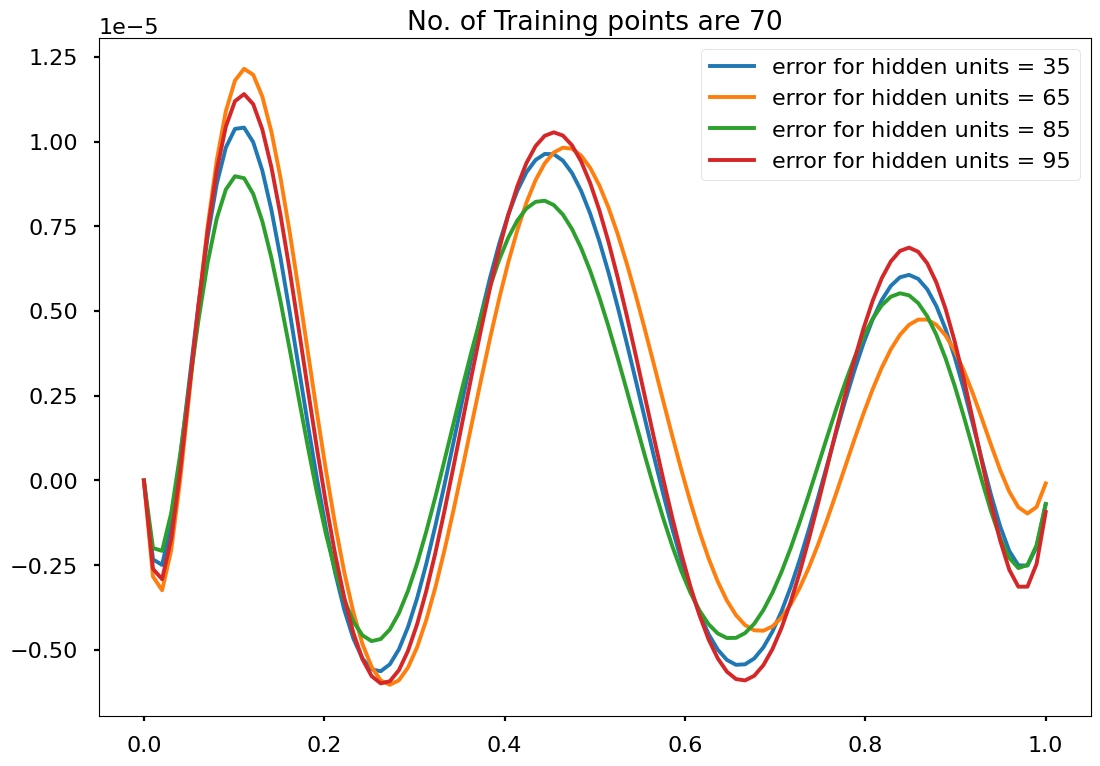

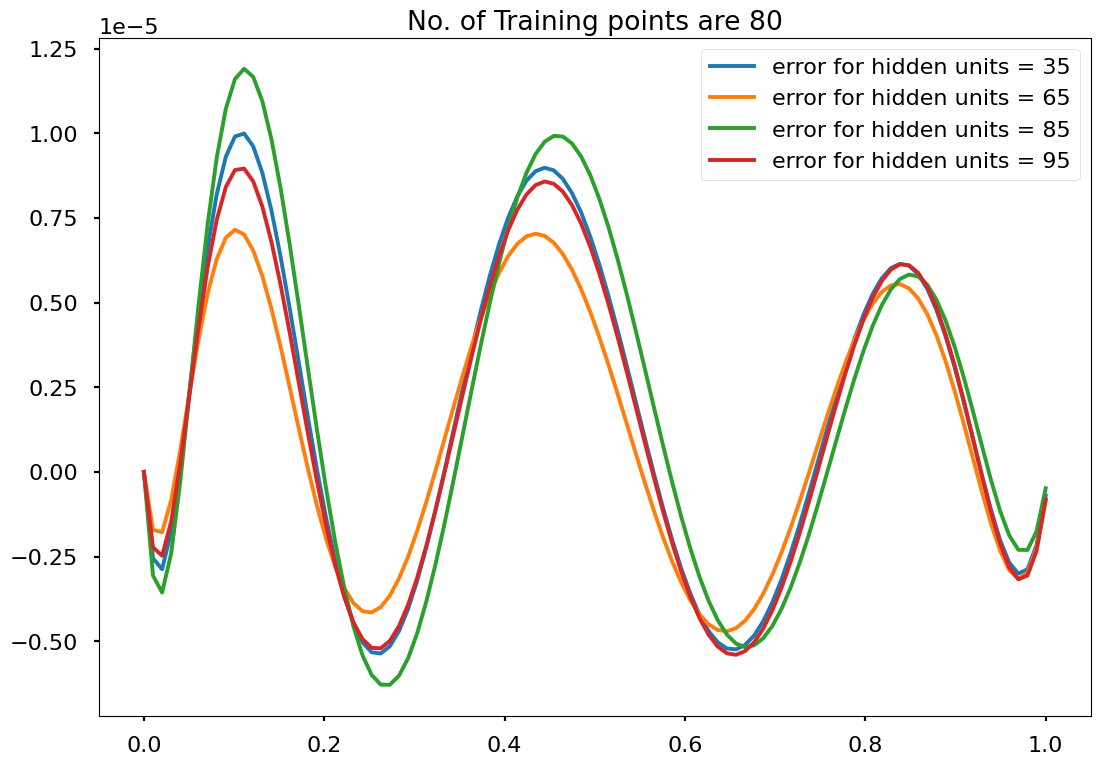

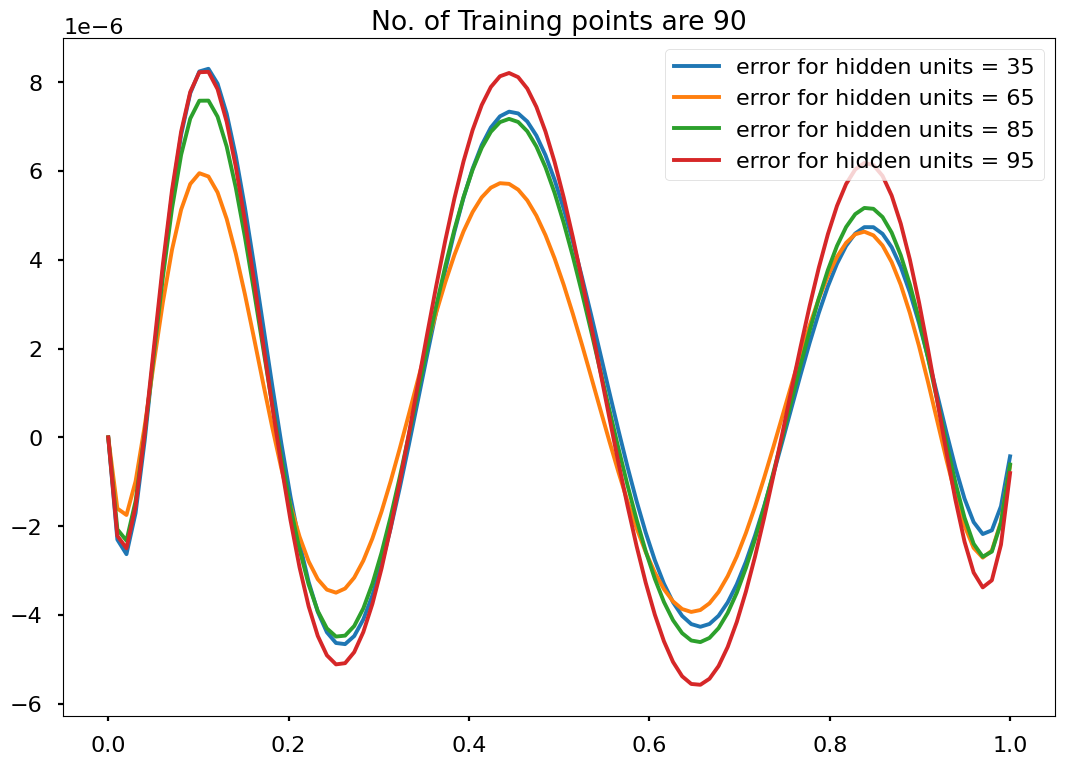

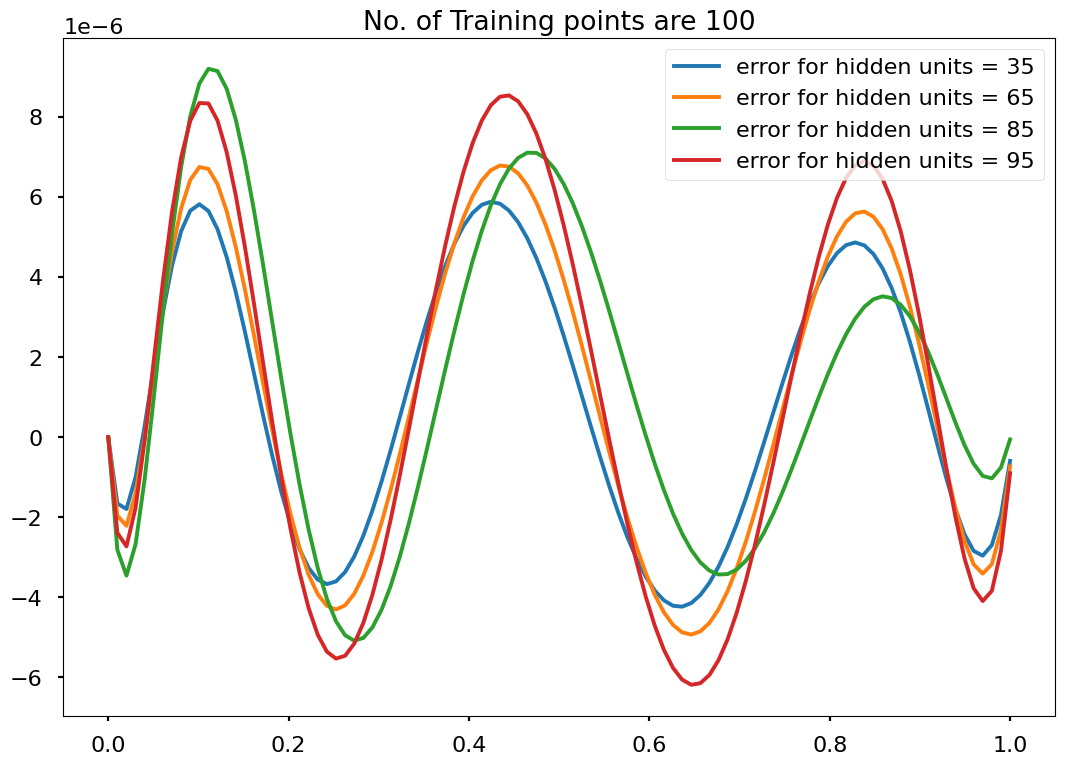

In [ ]:
for i in range(10,110,10):
  list_neuron = [35,65,85,95]
  plot_for_diff_hidd_units(list_neuron, i)

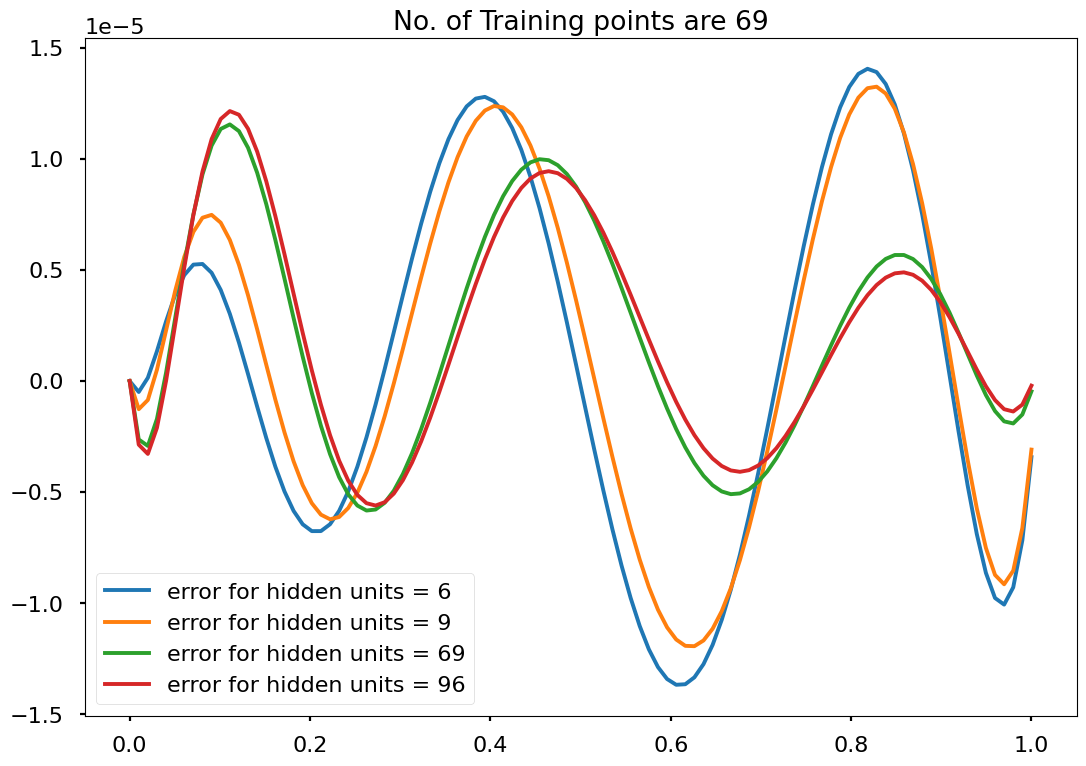

In [ ]:
  list_neuron = [6,9,69,96]
  plot_for_diff_hidd_units(list_neuron, 69)

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# You need to define a config file in the form of dictionary or yaml
sweep_config = {
    'method': 'grid',
    'name': 'sweep Hidden Units Training Datasets',
    'metric': {
        'name': 'Error',
        'goal': 'minimize'
    },
    'parameters': {
        'hiddenUnits': {
            'values': [i for i in range(10, 1010, 5)]
        },
        'trainingPoints': {
            'values': [i for i in range(10, 1010, 10)]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='ANN_Proj_Ques_1')

Create sweep with ID: ztm3j6g9
Sweep URL: https://wandb.ai/shubham821/ANN_Proj_Ques_1/sweeps/ztm3j6g9


In [ ]:
import wandb
import numpy as np
from scipy.optimize import minimize

def Error(config):
    hiddenUnits = config['hiddenUnits']
    trainingPoints = config['trainingPoints']
    x_test = np.linspace(0, 2, 100)

    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(hiddenUnits, trainingPoints)


      _, N = layer1NN(weights ,x_test)
      yi = 1+ x_test*N
      ysum += yi
    yt = ysum/run
    ya = my_function1(x_test)
    err = np.linalg.norm(yt-ya)

    wandb.log({"Error": err})

In [ ]:
def main():
    '''
    WandB calls main function each time with different combination.

    We can retrieve the same and use the same values for our hyperparameters.
    '''
    with wandb.init() as run:
        run_name = "-Hidd_units" + str(wandb.config.hiddenUnits) + "-Train_points_" + str(wandb.config.trainingPoints)
        wandb.run.name = run_name
        #obj=NN(wandb.config['num_layers'],wandb.config['hidden_size'])

        Error(wandb.config)

wandb.agent(sweep_id, function=main)  # calls main function for count number of times.
wandb.finish()

wandb: Agent Starting Run: 9c5uelfy with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 30


wandb: Ctrl + C detected. Stopping sweep.


In [ ]:
def plot_error_variance(neurons, train_points):
  x_test = np.linspace(0,1,100)
  ya = my_function(x_test)
  run = 20
  lst = []
  for i in range(20):
      weights = error_min_train_hidd(neurons, train_points)
      _, N = layer1NN(weights ,x_test)
      yi = 1+ x_test*N
      err = ((ya - yi).reshape(100,1))
      lst.append(err)
  lst = np.array(lst)
  mean_line = np.mean(lst, axis=0).reshape(100,)
  std_dev = np.std(lst, axis=0).reshape(100,)
  plt.plot(x_test, mean_line, color='blue', label='Mean')
  plt.fill_between(x_test, mean_line - std_dev, mean_line + std_dev, color='grey', alpha=0.5, label='Std Dev')
  plt.xlabel('X')
  plt.ylabel('Error')
  plt.title(f'Mean and Standard Deviation of 20 Error plots with Training points {train_points} and Hidden units {neurons}')
  plt.legend()
  plt.show()

In [ ]:
import time
def calc_time(nums, neurons, train_points):
  iter = nums
  elapsed_times = np.zeros(nums)
  for i in range(iter):
    start_time = time.time()
    weights = error_min_train_hidd(neurons, train_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times[i] = elapsed_time
  print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
  print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


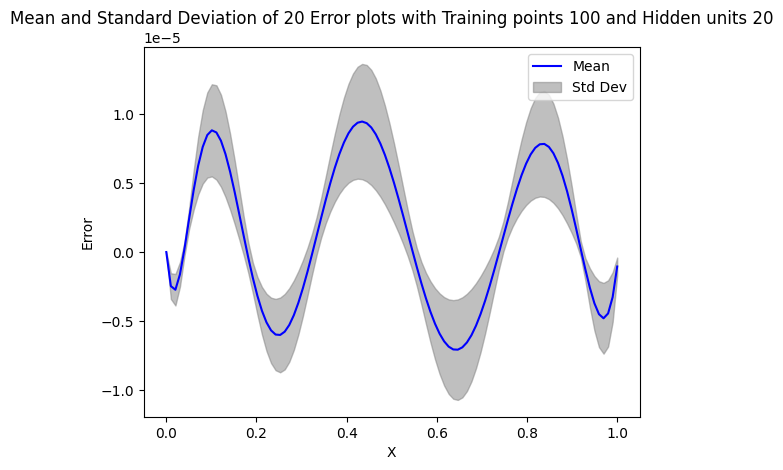

Mean time taken: 0.273391 seconds
Standard deviation: 0.159960 seconds


In [ ]:
plot_error_variance(20,100)
calc_time(100,20, 100)

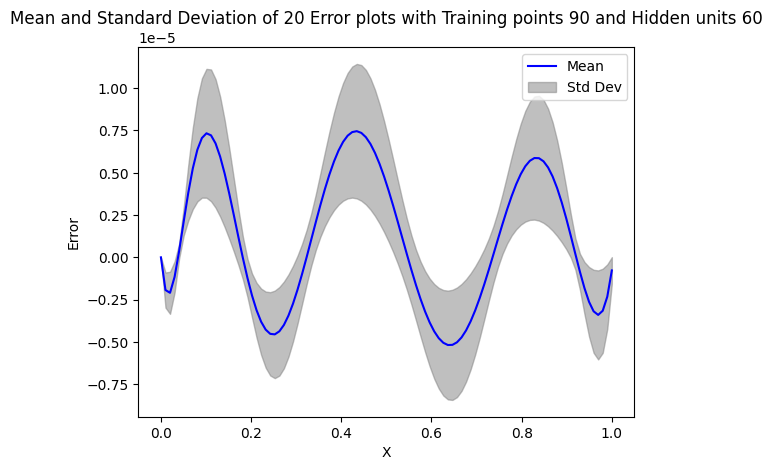

Mean time taken: 0.891434 seconds
Standard deviation: 0.632548 seconds


In [ ]:
plot_error_variance(60,90)
calc_time(100,60, 90)

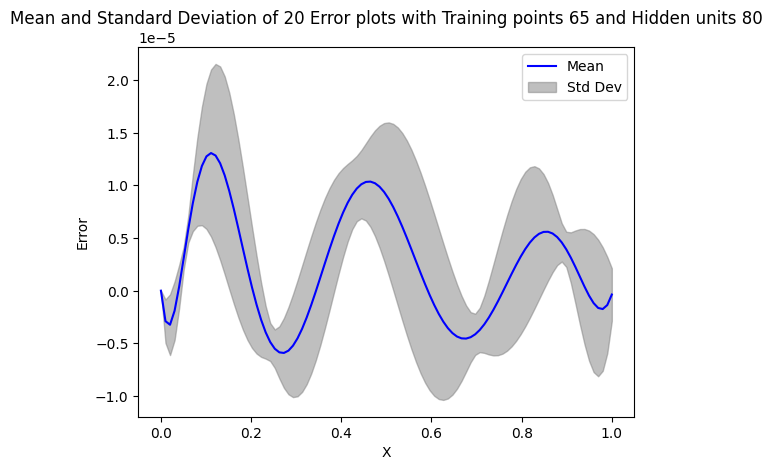

Mean time taken: 1.033208 seconds
Standard deviation: 0.674101 seconds


In [ ]:
plot_error_variance(80,65)
calc_time(100,80,65)

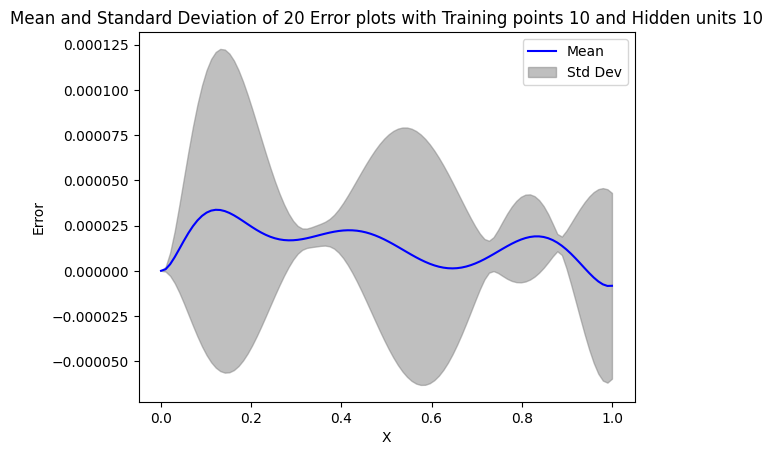

Mean time taken: 0.140820 seconds
Standard deviation: 0.100088 seconds


In [ ]:
plot_error_variance(10,10)
calc_time(100,10,10)

In [38]:
!python --version

Python 3.10.12
